In [1]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K

K.tensorflow_backend._get_available_gpus()

base_dir = r'C:\Users\Vítor\Documents\TCC\Banco de Dados\Imagens_JPG\Coronal\BD'

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 20

Using TensorFlow backend.


In [13]:
from keras import layers
from keras import models
#Criando a CNN
model = models.Sequential()
model.add(layers.Conv2D(64, (3, 3), activation='relu',
                        input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [14]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 72, 72, 128)       73856     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 36, 36, 128)       0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 34, 34, 256)       295168    
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 17, 17, 256)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 15, 15, 256)       590080    
__________

In [15]:
from keras import optimizers

model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['acc'])

In [16]:
from keras.preprocessing.image import ImageDataGenerator

# Todas as imagens em nova scale
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        
        train_dir,
        # Todas as images para novo tamanho de 150x150
        target_size=(150, 150),
        batch_size=20,
        # Como foi usado a perda binary_crossentropy, precisamos de rótulos binários
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 31880 images belonging to 2 classes.
Found 13720 images belonging to 2 classes.


In [17]:
for data_batch, labels_batch in train_generator:
    print('data batch shape:', data_batch.shape)
    print('labels batch shape:', labels_batch.shape)
    break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [18]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=50)

Epoch 1/30
100/100 [==============================] - 34s 339ms/step - loss: 0.6769 - acc: 0.5875 - val_loss: 0.6721 - val_acc: 0.5940
Epoch 2/30
100/100 [==============================] - 31s 313ms/step - loss: 0.6599 - acc: 0.6225 - val_loss: 0.7263 - val_acc: 0.4850
Epoch 3/30
100/100 [==============================] - 31s 312ms/step - loss: 0.6470 - acc: 0.6155 - val_loss: 0.6893 - val_acc: 0.5560
Epoch 4/30
100/100 [==============================] - 31s 309ms/step - loss: 0.6171 - acc: 0.6505 - val_loss: 0.7104 - val_acc: 0.5620
Epoch 5/30
100/100 [==============================] - 31s 309ms/step - loss: 0.5933 - acc: 0.6780 - val_loss: 0.6396 - val_acc: 0.6250
Epoch 6/30
100/100 [==============================] - 31s 309ms/step - loss: 0.5787 - acc: 0.6935 - val_loss: 0.6595 - val_acc: 0.6310
Epoch 7/30
100/100 [==============================] - 31s 310ms/step - loss: 0.5527 - acc: 0.7010 - val_loss: 0.6647 - val_acc: 0.6420
Epoch 8/30
100/100 [==============================] - 3

A acurácia da validação é de: 0.48800000101327895
A perda da validação é de: 1.9649348890781402


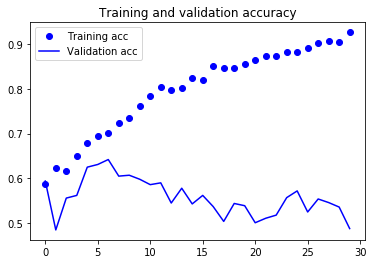

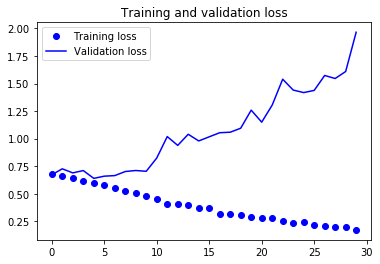

In [19]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print('A acurácia da validação é de:', val_acc[29])
print('A perda da validação é de:', val_loss[29])
epochs = range(len(acc))

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()